# Fake And Real News Detection With Desicion Tree

In [70]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report   
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
import pickle


In [71]:
# importing data

x_train_path = '../data/x_train.pkl'
x_test_path = '../data/x_test.pkl'
y_train_path = '../data/y_train.pkl'
y_test_path = '../data/y_test.pkl'

# Reading the pickle files
with open(x_train_path, 'rb') as file:
    x_train = pickle.load(file)

with open(x_test_path, 'rb') as file:
    x_test = pickle.load(file)

with open(y_train_path, 'rb') as file:
    y_train = pickle.load(file)

with open(y_test_path, 'rb') as file:
    y_test = pickle.load(file)





In [72]:
# Vectraizing the text data

vect = TfidfVectorizer(stop_words='english', max_df=0.7)
xv_train = vect.fit_transform(x_train)
xv_test = vect.transform(x_test)


In [73]:
model = DecisionTreeClassifier()
model.fit(xv_train, y_train)


DecisionTreeClassifier()

In [74]:
# Predicting the model
y_pred = model.predict(xv_test)
model.score(xv_test, y_test)


0.9993243243243243

Accuracy: 0.9993243243243243
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1437
           1       1.00      1.00      1.00      1523

    accuracy                           1.00      2960
   macro avg       1.00      1.00      1.00      2960
weighted avg       1.00      1.00      1.00      2960



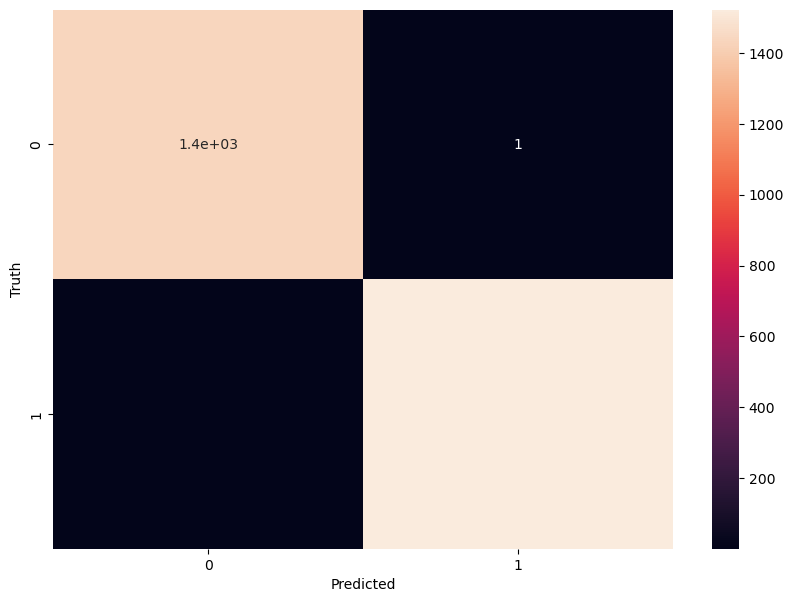

In [75]:
# make a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


# show to accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


